In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.preprocessing import Normalizer

In [ ]:
df = pd.read_csv('Obfuscated-MalMem2022.csv')
df

Category  pslist.nproc  \
0                                                 Benign            45   
1                                                 Benign            47   
2                                                 Benign            40   
3                                                 Benign            32   
4                                                 Benign            42   
...                                                  ...           ...   
58591  Ransomware-Shade-fa03be3078d1b9840f06745f160eb...            37   
58592  Ransomware-Shade-f56687137caf9a67678cde91e4614...            37   
58593  Ransomware-Shade-faddeea111a25da4d0888f3044ae9...            38   
58594  Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...            37   
58595  Ransomware-Shade-955d9af38346c1755527bd196668e...            38   

       pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0                17           10.555556                   0   
1                19           11.531915                   0   
2                14           14.725000                   0   
3                13           13.500000                   0   
4                16           11.452381                   0   
...             ...                 ...                 ...   
58591            15           10.108108                   0   
58592            14            9.945946                   0   
58593            15            9.842105                   0   
58594            15           10.243243                   0   
58595            15            9.868421                   0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0               202.844444           1694                  38.500000   
1               242.234043           2074                  44.127660   
2               288.225000           1932                  48.300000   
3               264.281250           1445                  45.156250   
4               281.333333           2067                  49.214286   
...                    ...            ...                        ...   
58591           215.486487           1453                  39.270270   
58592           190.216216           1347                  36.405405   
58593           210.026316           1448                  38.105263   
58594           215.513513           1452                  39.243243   
58595           213.026316           1487                  39.131579   

       handles.nhandles  handles.avg_handles_per_proc  ...  \
0                  9129                    212.302326  ...   
1                 11385                    242.234043  ...   
2                 11529                    288.225000  ...   
3                  8457                    264.281250  ...   
4                 11816                    281.333333  ...   
...                 ...                           ...  ...   
58591              7973                    215.486487  ...   
58592              7038                    190.216216  ...   
58593              7982                    215.729730  ...   
58594              7974                    215.513513  ...   
58595              8095                    213.026316  ...   

       svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0                         221                  26                        24   
1                         222                  26                        24   
2                         222                  26                        27   
3                         222                  26                        27   
4                         222                  26                        24   
...                       ...                 ...                       ...   
58591                     221                  26                        24   
58592                     221                  26                        24   
58593                     221                  26                        24   
58

In [ ]:
# Separating memory usage for benign and malicious samples
benign_memory = df[df['Class'] == 'Benign']['malfind.ninjections']
malicious_memory = df[df['Class'] == 'Malware']['malfind.ninjections']

# Creating a boxplot to compare memory usage distributions between the benign and malware infected samples
plt.boxplot([benign_memory, malicious_memory])
plt.xlabel('Sample Type')
plt.ylabel('Memory Usage (MB)')
plt.title('Comparison of Memory Usage')
plt.show()

In [ ]:
df = df.drop('Class', axis =1) #Class column holds 0,1 values (only to check if the sample has malware or not)

In [ ]:
missing_values = df.isnull().sum()
missing_values

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

In [ ]:
df = df.drop_duplicates()
df

Category  pslist.nproc  \
0                                                 Benign            45   
1                                                 Benign            47   
2                                                 Benign            40   
3                                                 Benign            32   
4                                                 Benign            42   
...                                                  ...           ...   
58591  Ransomware-Shade-fa03be3078d1b9840f06745f160eb...            37   
58592  Ransomware-Shade-f56687137caf9a67678cde91e4614...            37   
58593  Ransomware-Shade-faddeea111a25da4d0888f3044ae9...            38   
58594  Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...            37   
58595  Ransomware-Shade-955d9af38346c1755527bd196668e...            38   

       pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0                17           10.555556                   0   
1                19           11.531915                   0   
2                14           14.725000                   0   
3                13           13.500000                   0   
4                16           11.452381                   0   
...             ...                 ...                 ...   
58591            15           10.108108                   0   
58592            14            9.945946                   0   
58593            15            9.842105                   0   
58594            15           10.243243                   0   
58595            15            9.868421                   0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0               202.844444           1694                  38.500000   
1               242.234043           2074                  44.127660   
2               288.225000           1932                  48.300000   
3               264.281250           1445                  45.156250   
4               281.333333           2067                  49.214286   
...                    ...            ...                        ...   
58591           215.486487           1453                  39.270270   
58592           190.216216           1347                  36.405405   
58593           210.026316           1448                  38.105263   
58594           215.513513           1452                  39.243243   
58595           213.026316           1487                  39.131579   

       handles.nhandles  handles.avg_handles_per_proc  ...  svcscan.nservices  \
0                  9129                    212.302326  ...                389   
1                 11385                    242.234043  ...                392   
2                 11529                    288.225000  ...                395   
3                  8457                    264.281250  ...                395   
4                 11816                    281.333333  ...                392   
...                 ...                           ...  ...                ...   
58591              7973                    215.486487  ...                389   
58592              7038                    190.216216  ...                389   
58593              7982                    215.729730  ...                389   
58594              7974                    215.513513  ...                389   
58595              8095                    213.026316  ...                389   

       svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0                         221                  26                        24   
1                         222                  26                        24   
2                         222                  26                        27   
3                         222                  26                        27   
4                         222                  26                        24   
...                       ...                 ...                       ...   
58591      

In [ ]:
df['Category'].value_counts()

Benign                                                                                        29231
Spyware-Transponder-0d8fdbc97ffa7ec9867c58acdfb35d8e1faf39513203e9bd64f29b6c11f1018f-6.raw        2
Spyware-Transponder-0d608eae68f2dec2b02cb7469111073f3517c6f4088f40ca38713e631a707d30-8.raw        2
Spyware-Transponder-0d608eae68f2dec2b02cb7469111073f3517c6f4088f40ca38713e631a707d30-9.raw        2
Spyware-Transponder-0d6696c4c724553b3b449022bfb7312be9e75f7fad435805e598c4425ddac428-1.raw        2
                                                                                              ...  
Spyware-CWS-0e2eb62aa336f0258596aeb177e723fb1ee5bc2487643ea2020eec64e3430403-9.raw                1
Spyware-CWS-0e2eb62aa336f0258596aeb177e723fb1ee5bc2487643ea2020eec64e3430403-8.raw                1
Spyware-CWS-0e2eb62aa336f0258596aeb177e723fb1ee5bc2487643ea2020eec64e3430403-7.raw                1
Spyware-CWS-0e2eb62aa336f0258596aeb177e723fb1ee5bc2487643ea2020eec64e3430403-6.raw                1


In [ ]:
df['Category'] = df['Category'].replace(to_replace=r'^Spyware-180solutions.+$', value='Spyware-180solutions', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^Spyware-CWS.+$', value='Spyware-CWS', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^Spyware-TIBS.+$', value='Spyware-TIBS', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^Spyware-Gator.+$', value='Spyware-Gator', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^Spyware-Transponder.+$', value='Spyware-Transponder', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^Trojan-Emotet.+$', value='Trojan-Emotet', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^Trojan-Reconyc.+$', value='Trojan-Reconyc', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^Trojan-Refroso.+$', value='Trojan-Refroso', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^Trojan-Scar.+$', value='Trojan-Scar', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^Trojan-Zeus.+$', value='Trojan-Zeus', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^.*Ransomware-Conti.+$', value='Ransomware-Conti', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^.*Ransomware-Ako.+$', value='Ransomware-Ako', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^.*Ransomware-Maze.+$', value='Ransomware-Maze', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^.*Ransomware-Pysa.+$', value='Ransomware-Pysa', regex=True)
df['Category'] = df['Category'].replace(to_replace=r'^.*Ransomware-Shade.+$', value='Ransomware-Shade', regex=True)

classes=df['Category'].value_counts()
classes

Benign                  29298
Spyware-Transponder      2410
Spyware-Gator            2200
Ransomware-Shade         2128
Ransomware-Ako           2000
Spyware-180solutions     2000
Spyware-CWS              2000
Trojan-Refroso           2000
Trojan-Scar              2000
Ransomware-Conti         1988
Trojan-Emotet            1967
Ransomware-Maze          1958
Trojan-Zeus              1950
Ransomware-Pysa          1717
Trojan-Reconyc           1570
Spyware-TIBS             1410
Name: Category, dtype: int64

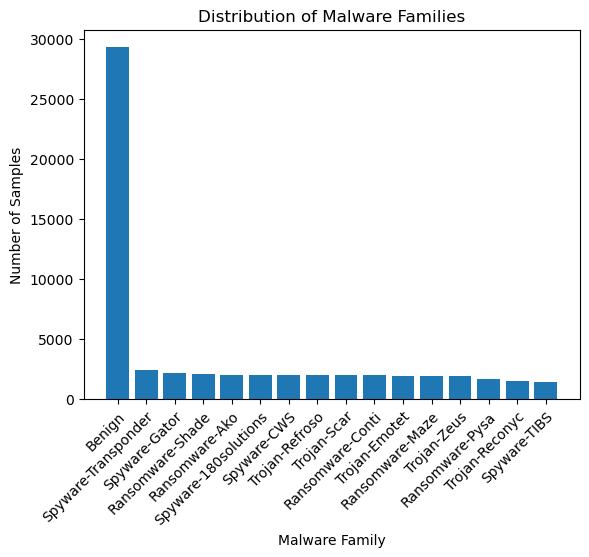

In [ ]:
# Count the number of samples in each malware family
family_counts = df['Category'].value_counts()

# Create a bar chart to represent the distribution
plt.bar(family_counts.index, family_counts.values)
plt.xlabel('Malware Family')
plt.ylabel('Number of Samples')
plt.title('Distribution of Malware Families')
plt.xticks(rotation=45)
plt.setp(plt.gca().get_xticklabels(), ha='right', rotation=45, wrap=True)
plt.show()

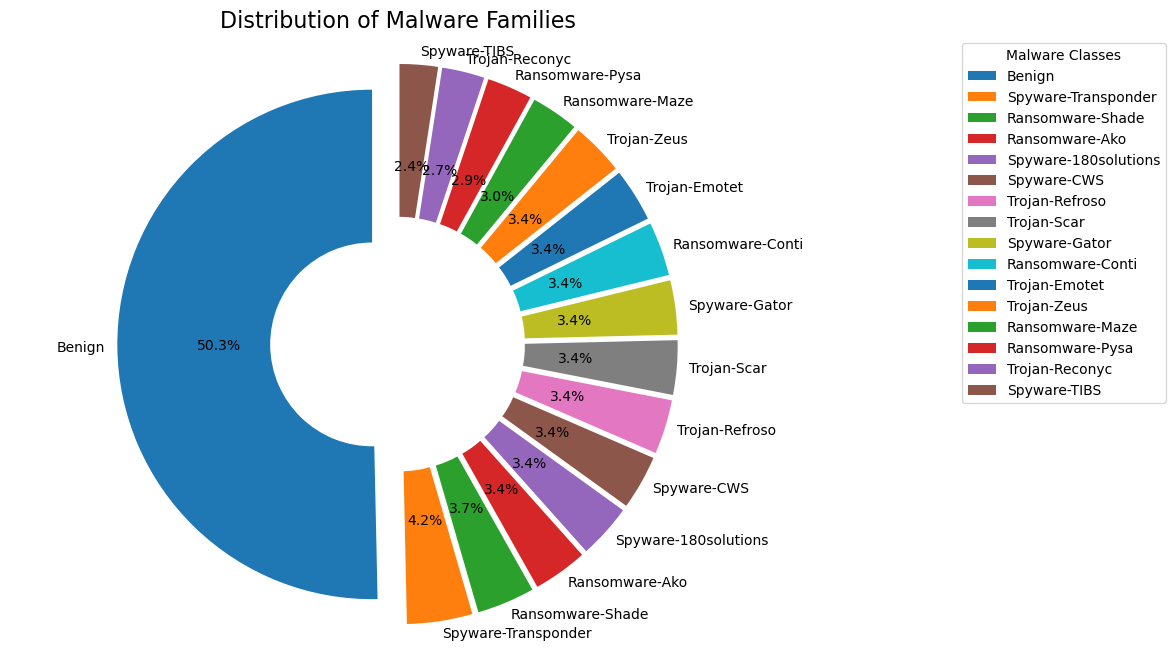

In [ ]:
value_counts = classes
plt.figure(figsize=(10, 8))

colors = plt.cm.tab10.colors

explode = [0.1] * len(value_counts)

plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90,
        shadow=False,labeldistance=1.05, colors=colors, explode=explode, wedgeprops=dict(width=0.6))

plt.title('Distribution of Malware Families', fontsize=16)

plt.legend(title='Malware Classes', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')

plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
# df['Class'] = label_encoder.fit_transform(df['Class'])
df

Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0             0            45            17           10.555556   
1             0            47            19           11.531915   
2             0            40            14           14.725000   
3             0            32            13           13.500000   
4             0            42            16           11.452381   
...         ...           ...           ...                 ...   
58591         5            37            15           10.108108   
58592         5            37            14            9.945946   
58593         5            38            15            9.842105   
58594         5            37            15           10.243243   
58595         5            38            15            9.868421   

       pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                       0           202.844444           1694   
1                       0           242.234043           2074   
2                       0           288.225000           1932   
3                       0           264.281250           1445   
4                       0           281.333333           2067   
...                   ...                  ...            ...   
58591                   0           215.486487           1453   
58592                   0           190.216216           1347   
58593                   0           210.026316           1448   
58594                   0           215.513513           1452   
58595                   0           213.026316           1487   

       dlllist.avg_dlls_per_proc  handles.nhandles  \
0                      38.500000              9129   
1                      44.127660             11385   
2                      48.300000             11529   
3                      45.156250              8457   
4                      49.214286             11816   
...                          ...               ...   
58591                  39.270270              7973   
58592                  36.405405              7038   
58593                  38.105263              7982   
58594                  39.243243              7974   
58595                  39.131579              8095   

       handles.avg_handles_per_proc  ...  svcscan.nservices  \
0                        212.302326  ...                389   
1                        242.234043  ...                392   
2                        288.225000  ...                395   
3                        264.281250  ...                395   
4                        281.333333  ...                392   
...                             ...  ...                ...   
58591                    215.486487  ...                389   
58592                    190.216216  ...                389   
58593                    215.729730  ...                389   
58594                    215.513513  ...                389   
58595                    213.026316  ...                389   

       svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0                         221                  26                        24   
1                         222                  26                        24   
2                         222                  26                        27   
3                         222                  26                        27   
4                         222                  26                        24   
...                       ...                 ...                       ...   
58591                     221                  26                        24   
58592                     221                  26                        24   
58593                     221                  26                        24   
58594                     221                  26                        24   
58595                     221                  26                        24   

       svcscan.shared_process_services  svcscan.interactive_proces

In [ ]:
df['Category'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

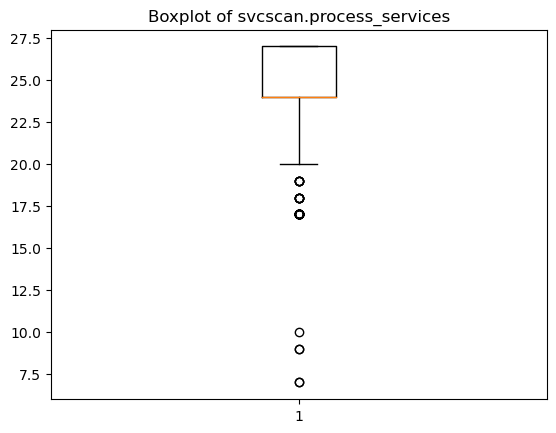

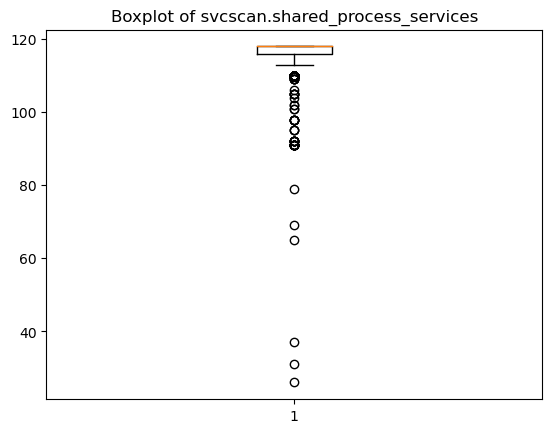

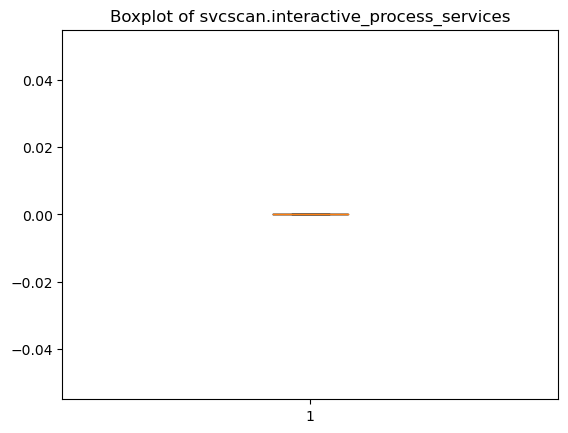

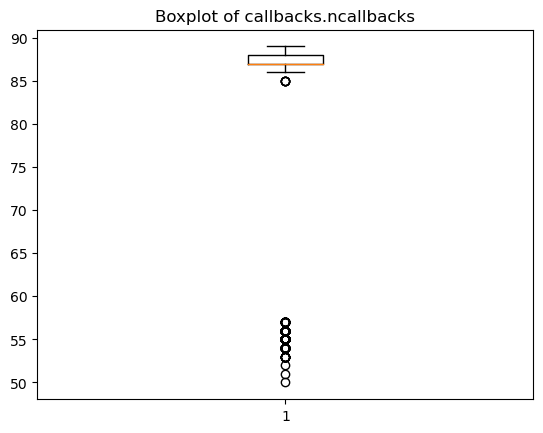

In [ ]:


# Select numerical features for boxplot analysis
numerical_features = ['svcscan.kernel_drivers', 'svcscan.fs_drivers', 'svcscan.process_services', 'svcscan.shared_process_services', 'svcscan.interactive_process_services', 'callbacks.ncallbacks']

# Create a boxplot for each numerical feature
for feature in numerical_features:
    plt.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

<Axes: >

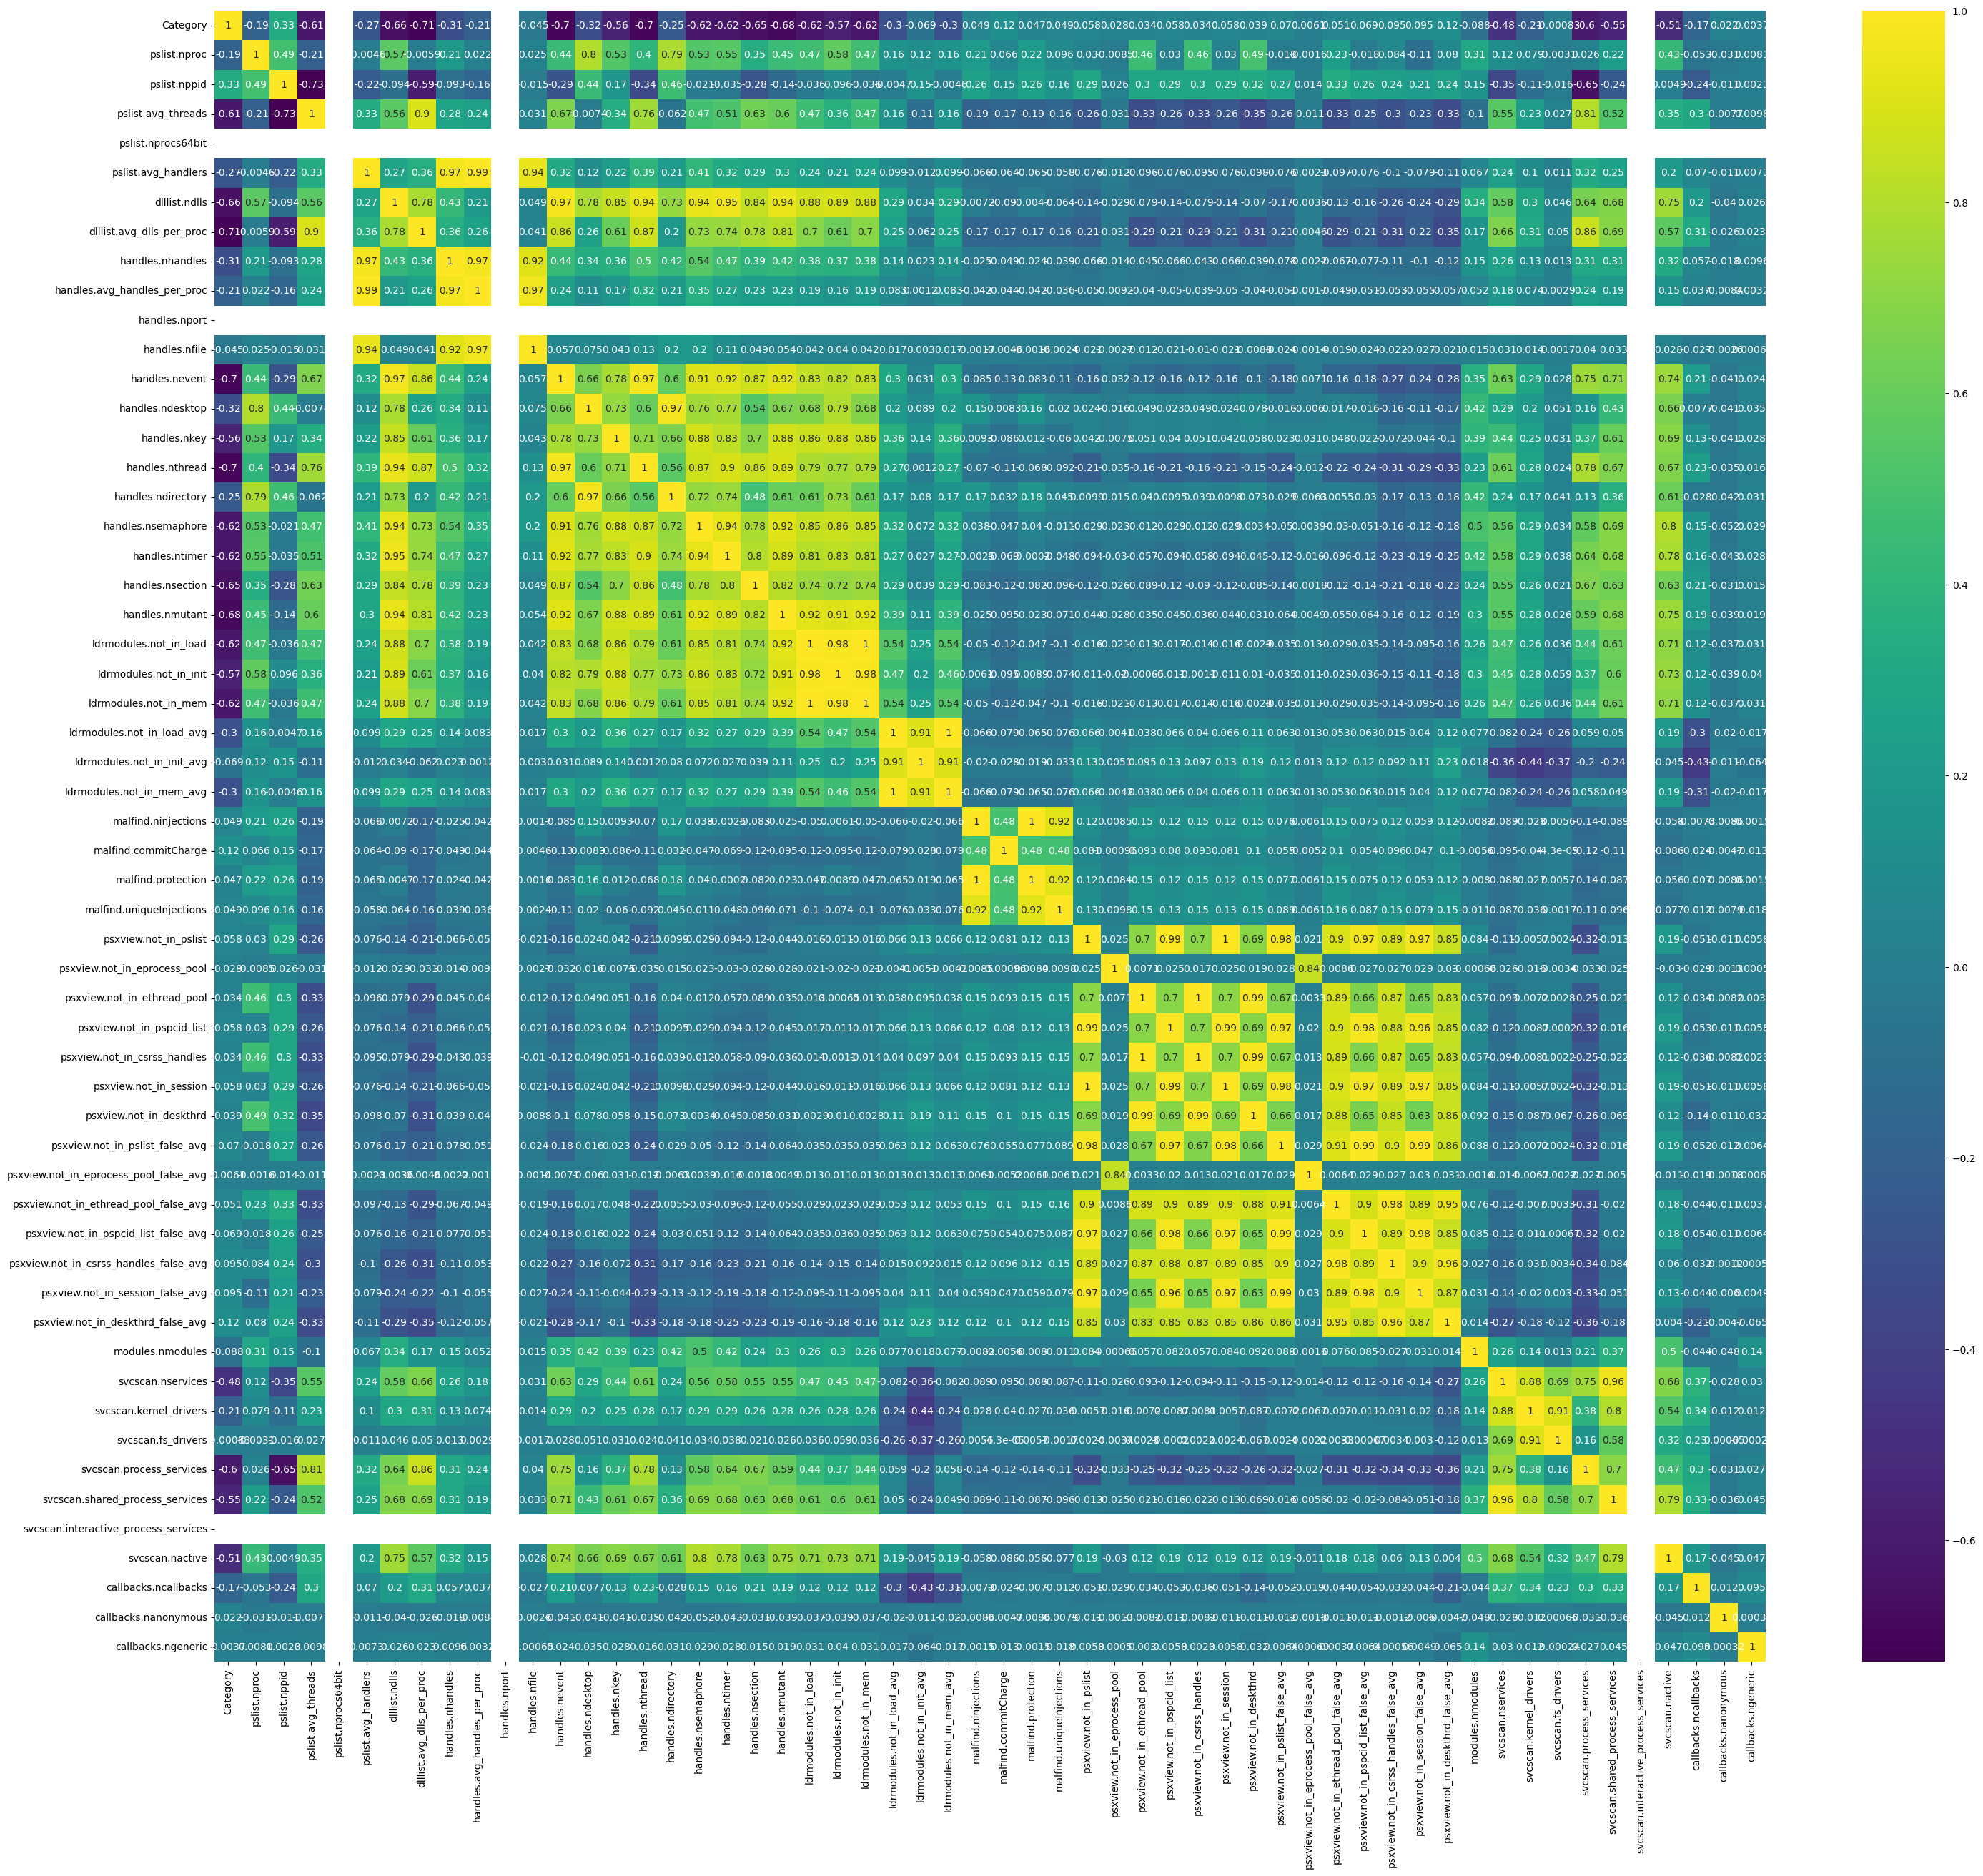

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize =(35,30))
sns.heatmap(
    corr_matrix,annot=True,cmap = 'viridis'
)

In [ ]:
df['pslist.nprocs64bit']

0        0
1        0
2        0
3        0
4        0
        ..
58591    0
58592    0
58593    0
58594    0
58595    0
Name: pslist.nprocs64bit, Length: 58062, dtype: int64

In [ ]:
drop_columns = ['psxview.not_in_eprocess_pool_false_avg','psxview.not_in_eprocess_pool','pslist.avg_threads','pslist.nppid','pslist.nproc','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric','handles.nport','pslist.nprocs64bit','svcscan.interactive_process_services']
df = df.drop(drop_columns, axis = 1)
df

Category  pslist.avg_handlers  dlllist.ndlls  \
0             0           202.844444           1694   
1             0           242.234043           2074   
2             0           288.225000           1932   
3             0           264.281250           1445   
4             0           281.333333           2067   
...         ...                  ...            ...   
58591         5           215.486487           1453   
58592         5           190.216216           1347   
58593         5           210.026316           1448   
58594         5           215.513513           1452   
58595         5           213.026316           1487   

       dlllist.avg_dlls_per_proc  handles.nhandles  \
0                      38.500000              9129   
1                      44.127660             11385   
2                      48.300000             11529   
3                      45.156250              8457   
4                      49.214286             11816   
...                          ...               ...   
58591                  39.270270              7973   
58592                  36.405405              7038   
58593                  38.105263              7982   
58594                  39.243243              7974   
58595                  39.131579              8095   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
0                        212.302326            670            3161   
1                        242.234043            840            3761   
2                        288.225000           1050            3996   
3                        264.281250            630            2961   
4                        281.333333            908            3834   
...                             ...            ...             ...   
58591                    215.486487            630            2819   
58592                    190.216216            603            2394   
58593                    215.729730            624            2816   
58594                    215.513513            632            2819   
58595                    213.026316            637            2843   

       handles.ndesktop  handles.nkey  ...  \
0                    46           716  ...   
1                    51          1011  ...   
2                    45           784  ...   
3                    36           654  ...   
4                    45          1252  ...   
...                 ...           ...  ...   
58591                40           668  ...   
58592                39           555  ...   
58593                40           673  ...   
58594                40           668  ...   
58595                41           683  ...   

       psxview.not_in_pspcid_list_false_avg  \
0                                  0.042553   
1                                  0.000000   
2                                  0.000000   
3                                  0.000000   
4                                  0.086957   
...                                     ...   
58591                              0.026316   
58592                              0.000000   
58593                              0.050000   
58594                              0.000000   
58595                              0.073171   

       psxview.not_in_csrss_handles_false_avg  \
0                                    0.148936   
1                                    0.085106   
2                                    0.100000   
3                                    0.125000   
4                                    0.173913   
...                                       ...   
58591                                0.131579   
58592                                0.108108   
58593                                0.175000   
58594                                0.108108   
58595                                0.170732   

       psxview.not_in_session_false_avg  psxview.not_in_deskthrd_false_avg  \
0                              0.085106                           0.191

<Axes: >

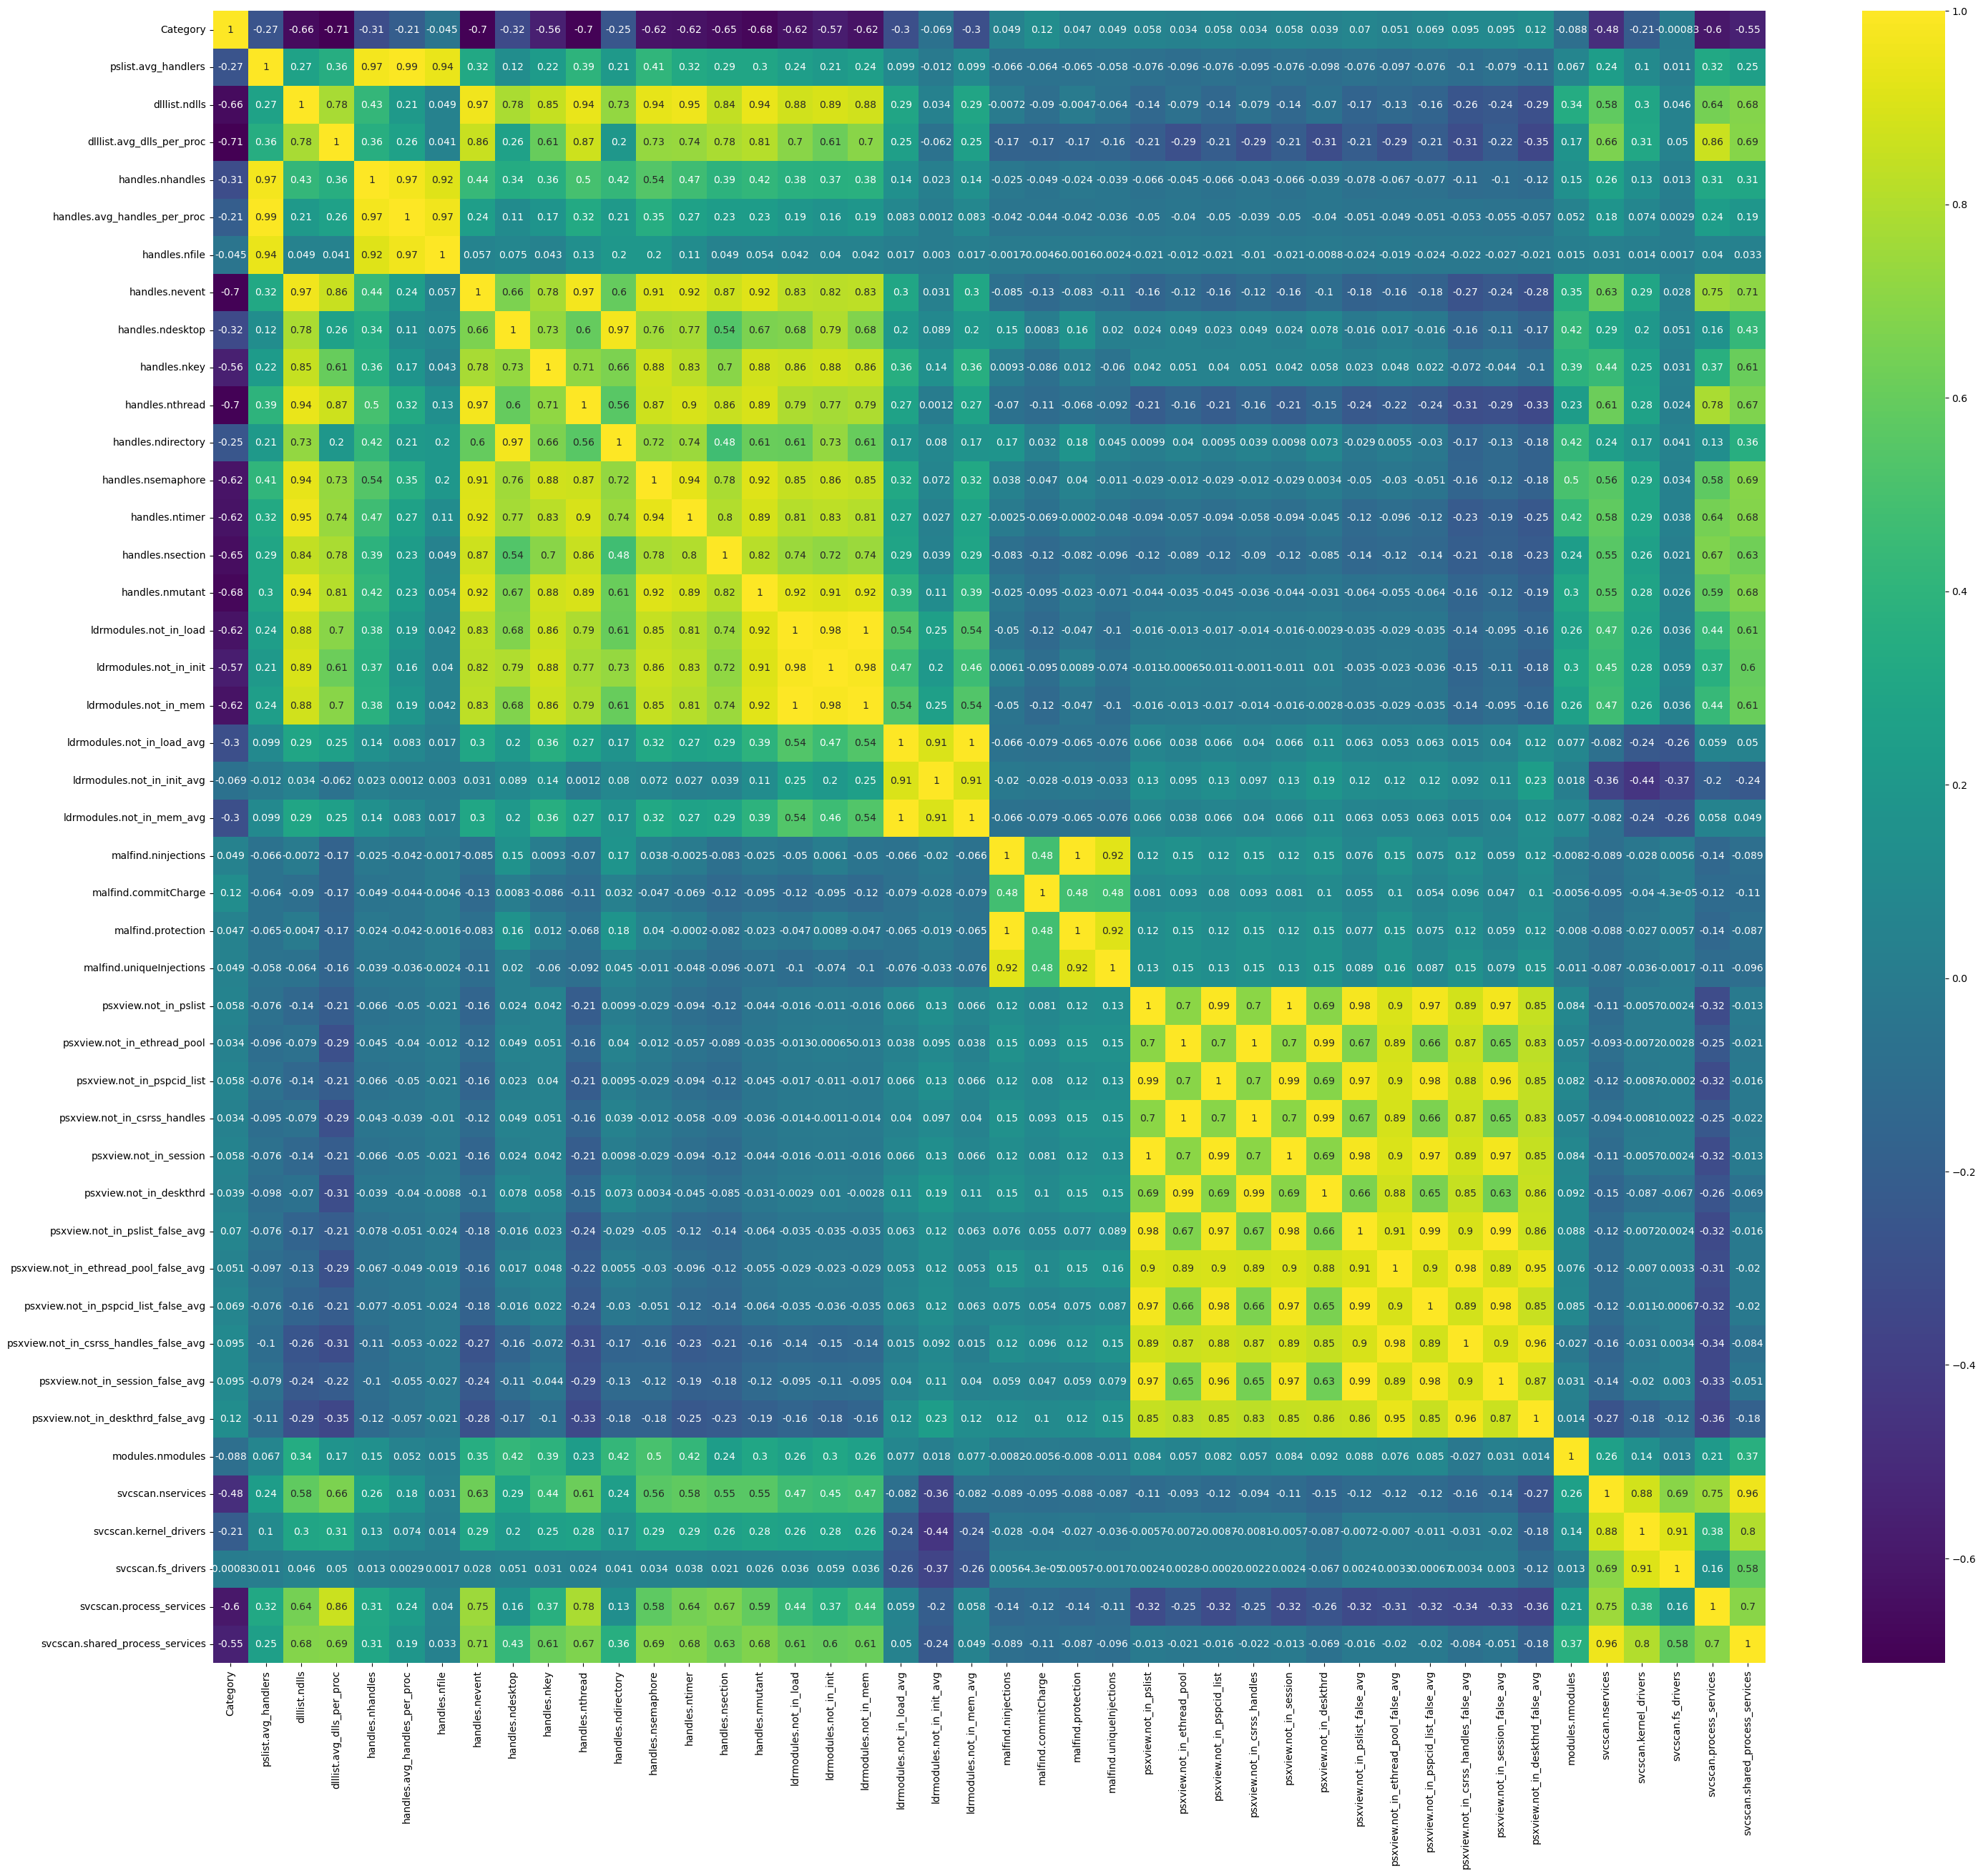

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize =(35,30))
sns.heatmap(
    corr_matrix,annot=True,cmap = 'viridis'
)

In [ ]:
X = df.drop('Category', axis = 1)
y = df['Category']
X

pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0               202.844444           1694                  38.500000   
1               242.234043           2074                  44.127660   
2               288.225000           1932                  48.300000   
3               264.281250           1445                  45.156250   
4               281.333333           2067                  49.214286   
...                    ...            ...                        ...   
58591           215.486487           1453                  39.270270   
58592           190.216216           1347                  36.405405   
58593           210.026316           1448                  38.105263   
58594           215.513513           1452                  39.243243   
58595           213.026316           1487                  39.131579   

       handles.nhandles  handles.avg_handles_per_proc  handles.nfile  \
0                  9129                    212.302326            670   
1                 11385                    242.234043            840   
2                 11529                    288.225000           1050   
3                  8457                    264.281250            630   
4                 11816                    281.333333            908   
...                 ...                           ...            ...   
58591              7973                    215.486487            630   
58592              7038                    190.216216            603   
58593              7982                    215.729730            624   
58594              7974                    215.513513            632   
58595              8095                    213.026316            637   

       handles.nevent  handles.ndesktop  handles.nkey  handles.nthread  ...  \
0                3161                46           716              887  ...   
1                3761                51          1011             1030  ...   
2                3996                45           784             1241  ...   
3                2961                36           654              792  ...   
4                3834                45          1252              942  ...   
...               ...               ...           ...              ...  ...   
58591            2819                40           668              664  ...   
58592            2394                39           555              624  ...   
58593            2816                40           673              661  ...   
58594            2819                40           668              667  ...   
58595            2843                41           683              669  ...   

       psxview.not_in_pspcid_list_false_avg  \
0                                  0.042553   
1                                  0.000000   
2                                  0.000000   
3                                  0.000000   
4                                  0.086957   
...                                     ...   
58591                              0.026316   
58592                              0.000000   
58593                              0.050000   
58594                              0.000000   
58595                              0.073171   

       psxview.not_in_csrss_handles_false_avg  \
0                                    0.148936   
1                                    0.085106   
2                                    0.100000   
3                                    0.125000   
4                                    0.173913   
...                                       ...   
58591                                0.131579   
58592                                0.108108   
58593                                0.175000   
58594                                0.108108   
58595                                0.170732   

       psxview.not_in_session_false_avg  psxview.not_in_deskthrd_false_avg  \
0                              0.085106                           0.191489   
1                 

In [ ]:
X.var()

pslist.avg_handlers                       1.260802e+04
dlllist.ndlls                             1.088052e+05
dlllist.avg_dlls_per_proc                 3.292806e+01
handles.nhandles                          2.385937e+07
handles.avg_handles_per_proc              2.149447e+04
handles.nfile                             1.188879e+07
handles.nevent                            6.488154e+05
handles.ndesktop                          2.666410e+01
handles.nkey                              2.265895e+04
handles.nthread                           5.658749e+04
handles.ndirectory                        9.570920e+01
handles.nsemaphore                        8.917897e+03
handles.ntimer                            2.236982e+02
handles.nsection                          2.085933e+04
handles.nmutant                           5.358371e+03
ldrmodules.not_in_load                    3.527028e+02
ldrmodules.not_in_init                    4.605701e+02
ldrmodules.not_in_mem                     3.526464e+02
ldrmodules

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_train.shape, X_test.shape

((40643, 43), (17419, 43))

In [ ]:
svc_classifier = SVC(kernel='linear', probability=True)
mlp_classifier = MLPClassifier(alpha = 0.1, learning_rate = "constant", max_iter = 2000, random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
lgbm_classifier = LGBMClassifier(random_state=42)


# Create a BaggingClassifier with a list of base classifiers
voting_clf = VotingClassifier(estimators=[('xgb', xgb_classifier), ('svc', svc_classifier), ('mlp', mlp_classifier),('lgb', lgbm_classifier)], voting='soft', n_jobs=-1)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('svc', SVC(kernel='linear', probability=True)),
                             ('mlp',
                              MLPClassifier(alpha=0.1, max_iter=2000,
                                            random_state=42)),
                             ('lgb', LGBMClassifier(random_state=42))],
                 n_jobs=-1, voting='soft')

In [ ]:
y_hat = voting_clf.predict(X_test)

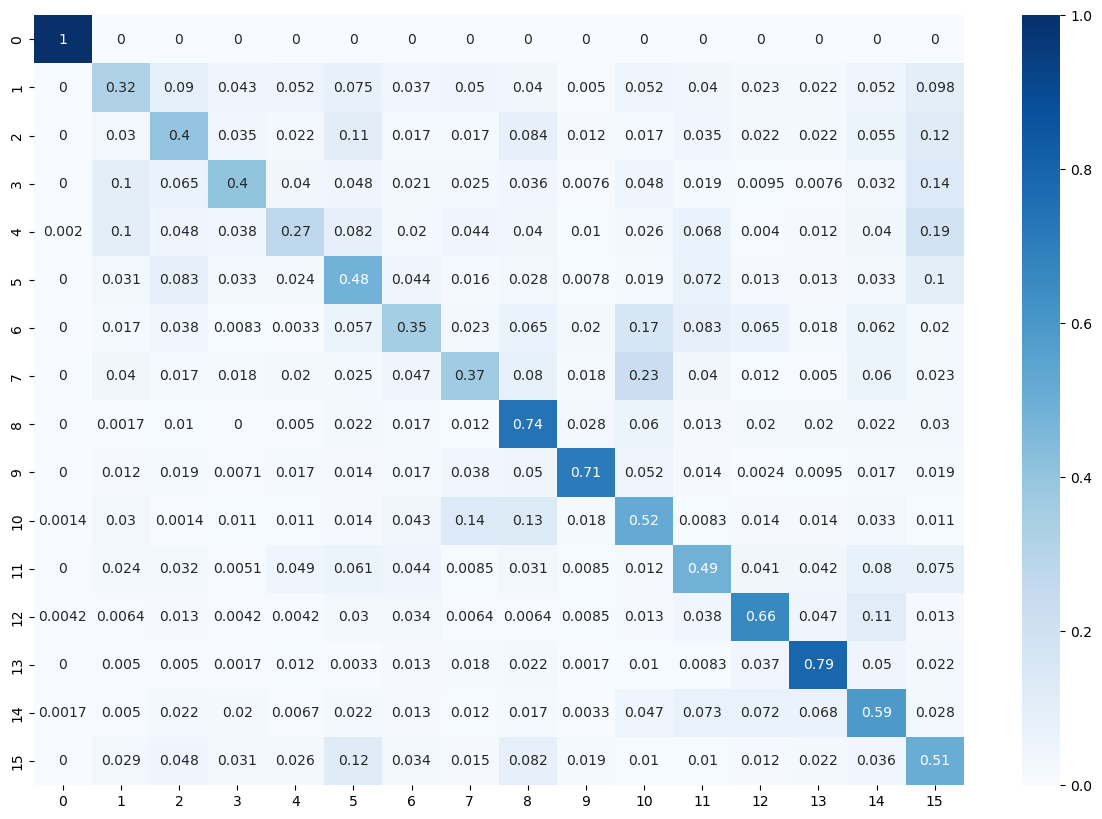

In [ ]:
k1 = confusion_matrix(y_test, y_hat)
cmn = k1.astype('float') / k1.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(15,10))
sns_plot = sns.heatmap(cmn, annot=True, cmap='Blues',xticklabels = list(voting_clf.classes_), yticklabels = list(voting_clf.classes_))
fig1 = sns_plot.get_figure()

In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8770
           1       0.44      0.32      0.37       600
           2       0.46      0.40      0.43       596
           3       0.59      0.40      0.48       526
           4       0.44      0.27      0.34       498
           5       0.44      0.48      0.46       638
           6       0.47      0.35      0.40       600
           7       0.46      0.37      0.41       600
           8       0.51      0.74      0.60       599
           9       0.75      0.71      0.73       423
          10       0.46      0.52      0.49       723
          11       0.49      0.49      0.49       590
          12       0.60      0.66      0.63       471
          13       0.72      0.79      0.75       600
          14       0.48      0.59      0.53       600
          15       0.37      0.51      0.43       585

    accuracy                           0.75     17419
   macro avg       0.54   

For binary classification

In [ ]:
df = pd.read_csv('Obfuscated-MalMem2022.csv')
df

Category  pslist.nproc  \
0                                                 Benign            45   
1                                                 Benign            47   
2                                                 Benign            40   
3                                                 Benign            32   
4                                                 Benign            42   
...                                                  ...           ...   
58591  Ransomware-Shade-fa03be3078d1b9840f06745f160eb...            37   
58592  Ransomware-Shade-f56687137caf9a67678cde91e4614...            37   
58593  Ransomware-Shade-faddeea111a25da4d0888f3044ae9...            38   
58594  Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...            37   
58595  Ransomware-Shade-955d9af38346c1755527bd196668e...            38   

       pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0                17           10.555556                   0   
1                19           11.531915                   0   
2                14           14.725000                   0   
3                13           13.500000                   0   
4                16           11.452381                   0   
...             ...                 ...                 ...   
58591            15           10.108108                   0   
58592            14            9.945946                   0   
58593            15            9.842105                   0   
58594            15           10.243243                   0   
58595            15            9.868421                   0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0               202.844444           1694                  38.500000   
1               242.234043           2074                  44.127660   
2               288.225000           1932                  48.300000   
3               264.281250           1445                  45.156250   
4               281.333333           2067                  49.214286   
...                    ...            ...                        ...   
58591           215.486487           1453                  39.270270   
58592           190.216216           1347                  36.405405   
58593           210.026316           1448                  38.105263   
58594           215.513513           1452                  39.243243   
58595           213.026316           1487                  39.131579   

       handles.nhandles  handles.avg_handles_per_proc  ...  \
0                  9129                    212.302326  ...   
1                 11385                    242.234043  ...   
2                 11529                    288.225000  ...   
3                  8457                    264.281250  ...   
4                 11816                    281.333333  ...   
...                 ...                           ...  ...   
58591              7973                    215.486487  ...   
58592              7038                    190.216216  ...   
58593              7982                    215.729730  ...   
58594              7974                    215.513513  ...   
58595              8095                    213.026316  ...   

       svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0                         221                  26                        24   
1                         222                  26                        24   
2                         222                  26                        27   
3                         222                  26                        27   
4                         222                  26                        24   
...                       ...                 ...                       ...   
58591                     221                  26                        24   
58592                     221                  26                        24   
58593                     221                  26                        24   
58

In [ ]:
df = df.drop_duplicates()
df

Category  pslist.nproc  \
0                                                 Benign            45   
1                                                 Benign            47   
2                                                 Benign            40   
3                                                 Benign            32   
4                                                 Benign            42   
...                                                  ...           ...   
58591  Ransomware-Shade-fa03be3078d1b9840f06745f160eb...            37   
58592  Ransomware-Shade-f56687137caf9a67678cde91e4614...            37   
58593  Ransomware-Shade-faddeea111a25da4d0888f3044ae9...            38   
58594  Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...            37   
58595  Ransomware-Shade-955d9af38346c1755527bd196668e...            38   

       pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0                17           10.555556                   0   
1                19           11.531915                   0   
2                14           14.725000                   0   
3                13           13.500000                   0   
4                16           11.452381                   0   
...             ...                 ...                 ...   
58591            15           10.108108                   0   
58592            14            9.945946                   0   
58593            15            9.842105                   0   
58594            15           10.243243                   0   
58595            15            9.868421                   0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0               202.844444           1694                  38.500000   
1               242.234043           2074                  44.127660   
2               288.225000           1932                  48.300000   
3               264.281250           1445                  45.156250   
4               281.333333           2067                  49.214286   
...                    ...            ...                        ...   
58591           215.486487           1453                  39.270270   
58592           190.216216           1347                  36.405405   
58593           210.026316           1448                  38.105263   
58594           215.513513           1452                  39.243243   
58595           213.026316           1487                  39.131579   

       handles.nhandles  handles.avg_handles_per_proc  ...  \
0                  9129                    212.302326  ...   
1                 11385                    242.234043  ...   
2                 11529                    288.225000  ...   
3                  8457                    264.281250  ...   
4                 11816                    281.333333  ...   
...                 ...                           ...  ...   
58591              7973                    215.486487  ...   
58592              7038                    190.216216  ...   
58593              7982                    215.729730  ...   
58594              7974                    215.513513  ...   
58595              8095                    213.026316  ...   

       svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0                         221                  26                        24   
1                         222                  26                        24   
2                         222                  26                        27   
3                         222                  26                        27   
4                         222                  26                        24   
...                       ...                 ...                       ...   
58591                     221                  26                        24   
58592                     221                  26                        24   
58593                     221                  26                        24   
58

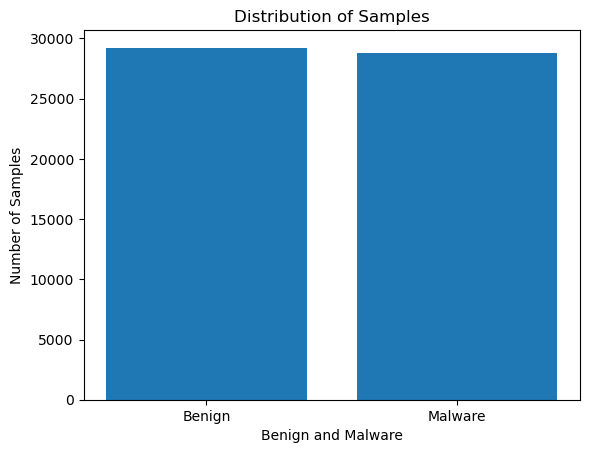

In [ ]:
# Count the number of samples in each malware family
family_counts = df['Class'].value_counts()

# Create a bar chart to represent the distribution
plt.bar(family_counts.index, family_counts.values)
plt.xlabel('Benign and Malware')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples')
plt.show()

In [ ]:
df = df.drop('Category', axis =1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])
df

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0                45            17           10.555556                   0   
1                47            19           11.531915                   0   
2                40            14           14.725000                   0   
3                32            13           13.500000                   0   
4                42            16           11.452381                   0   
...             ...           ...                 ...                 ...   
58591            37            15           10.108108                   0   
58592            37            14            9.945946                   0   
58593            38            15            9.842105                   0   
58594            37            15           10.243243                   0   
58595            38            15            9.868421                   0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0               202.844444           1694                  38.500000   
1               242.234043           2074                  44.127660   
2               288.225000           1932                  48.300000   
3               264.281250           1445                  45.156250   
4               281.333333           2067                  49.214286   
...                    ...            ...                        ...   
58591           215.486487           1453                  39.270270   
58592           190.216216           1347                  36.405405   
58593           210.026316           1448                  38.105263   
58594           215.513513           1452                  39.243243   
58595           213.026316           1487                  39.131579   

       handles.nhandles  handles.avg_handles_per_proc  handles.nport  ...  \
0                  9129                    212.302326              0  ...   
1                 11385                    242.234043              0  ...   
2                 11529                    288.225000              0  ...   
3                  8457                    264.281250              0  ...   
4                 11816                    281.333333              0  ...   
...                 ...                           ...            ...  ...   
58591              7973                    215.486487              0  ...   
58592              7038                    190.216216              0  ...   
58593              7982                    215.729730              0  ...   
58594              7974                    215.513513              0  ...   
58595              8095                    213.026316              0  ...   

       svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0                         221                  26                        24   
1                         222                  26                        24   
2                         222                  26                        27   
3                         222                  26                        27   
4                         222                  26                        24   
...                       ...                 ...                       ...   
58591                     221                  26                        24   
58592                     221                  26                        24   
58593                     221                  26                        24   
58594                     221                  26                        24   
58595                     221                  26                        24   

       svcscan.shared_process_services  svcscan.interactive_process_services  \
0                                  116                                     0   
1                                  118                                     0   
2                                  118                                     0   
3                      

In [ ]:
drop_columns = ['psxview.not_in_eprocess_pool_false_avg','psxview.not_in_eprocess_pool','pslist.avg_threads','pslist.nppid','pslist.nproc','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric','handles.nport','pslist.nprocs64bit','svcscan.interactive_process_services']
df = df.drop(drop_columns, axis = 1)
df

pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0               202.844444           1694                  38.500000   
1               242.234043           2074                  44.127660   
2               288.225000           1932                  48.300000   
3               264.281250           1445                  45.156250   
4               281.333333           2067                  49.214286   
...                    ...            ...                        ...   
58591           215.486487           1453                  39.270270   
58592           190.216216           1347                  36.405405   
58593           210.026316           1448                  38.105263   
58594           215.513513           1452                  39.243243   
58595           213.026316           1487                  39.131579   

       handles.nhandles  handles.avg_handles_per_proc  handles.nfile  \
0                  9129                    212.302326            670   
1                 11385                    242.234043            840   
2                 11529                    288.225000           1050   
3                  8457                    264.281250            630   
4                 11816                    281.333333            908   
...                 ...                           ...            ...   
58591              7973                    215.486487            630   
58592              7038                    190.216216            603   
58593              7982                    215.729730            624   
58594              7974                    215.513513            632   
58595              8095                    213.026316            637   

       handles.nevent  handles.ndesktop  handles.nkey  handles.nthread  ...  \
0                3161                46           716              887  ...   
1                3761                51          1011             1030  ...   
2                3996                45           784             1241  ...   
3                2961                36           654              792  ...   
4                3834                45          1252              942  ...   
...               ...               ...           ...              ...  ...   
58591            2819                40           668              664  ...   
58592            2394                39           555              624  ...   
58593            2816                40           673              661  ...   
58594            2819                40           668              667  ...   
58595            2843                41           683              669  ...   

       psxview.not_in_csrss_handles_false_avg  \
0                                    0.148936   
1                                    0.085106   
2                                    0.100000   
3                                    0.125000   
4                                    0.173913   
...                                       ...   
58591                                0.131579   
58592                                0.108108   
58593                                0.175000   
58594                                0.108108   
58595                                0.170732   

       psxview.not_in_session_false_avg  psxview.not_in_deskthrd_false_avg  \
0                              0.085106                           0.191489   
1                              0.042553                           0.127660   
2                              0.050000                           0.125000   
3                              0.062500                           0.187500   
4                              0.130435                           0.217391   
...                                 ...                                ...   
58591                          0.078947                           0.184211   
58592                          0.054054                           0.162162   
58593                          0.1000

In [ ]:
X = df.drop('Class', axis = 1)
y = df['Class']
X

pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0               202.844444           1694                  38.500000   
1               242.234043           2074                  44.127660   
2               288.225000           1932                  48.300000   
3               264.281250           1445                  45.156250   
4               281.333333           2067                  49.214286   
...                    ...            ...                        ...   
58591           215.486487           1453                  39.270270   
58592           190.216216           1347                  36.405405   
58593           210.026316           1448                  38.105263   
58594           215.513513           1452                  39.243243   
58595           213.026316           1487                  39.131579   

       handles.nhandles  handles.avg_handles_per_proc  handles.nfile  \
0                  9129                    212.302326            670   
1                 11385                    242.234043            840   
2                 11529                    288.225000           1050   
3                  8457                    264.281250            630   
4                 11816                    281.333333            908   
...                 ...                           ...            ...   
58591              7973                    215.486487            630   
58592              7038                    190.216216            603   
58593              7982                    215.729730            624   
58594              7974                    215.513513            632   
58595              8095                    213.026316            637   

       handles.nevent  handles.ndesktop  handles.nkey  handles.nthread  ...  \
0                3161                46           716              887  ...   
1                3761                51          1011             1030  ...   
2                3996                45           784             1241  ...   
3                2961                36           654              792  ...   
4                3834                45          1252              942  ...   
...               ...               ...           ...              ...  ...   
58591            2819                40           668              664  ...   
58592            2394                39           555              624  ...   
58593            2816                40           673              661  ...   
58594            2819                40           668              667  ...   
58595            2843                41           683              669  ...   

       psxview.not_in_pspcid_list_false_avg  \
0                                  0.042553   
1                                  0.000000   
2                                  0.000000   
3                                  0.000000   
4                                  0.086957   
...                                     ...   
58591                              0.026316   
58592                              0.000000   
58593                              0.050000   
58594                              0.000000   
58595                              0.073171   

       psxview.not_in_csrss_handles_false_avg  \
0                                    0.148936   
1                                    0.085106   
2                                    0.100000   
3                                    0.125000   
4                                    0.173913   
...                                       ...   
58591                                0.131579   
58592                                0.108108   
58593                                0.175000   
58594                                0.108108   
58595                                0.170732   

       psxview.not_in_session_false_avg  psxview.not_in_deskthrd_false_avg  \
0                              0.085106                           0.191489   
1                 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
norm = Normalizer()
norm.fit(X)
X = norm.transform(X)

In [ ]:
#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_train.shape, X_test.shape

((40643, 43), (17419, 43))

In [ ]:
svc_classifier = SVC(kernel='linear', probability=True)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Create a BaggingClassifier with a list of base classifiers
voting_clf = VotingClassifier(estimators=[('svc', svc_classifier), ('knn', knn_classifier)], voting='hard', n_jobs=-1)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC(kernel='linear', probability=True)),
                             ('knn', KNeighborsClassifier())],
                 n_jobs=-1)

In [ ]:
y_hat = voting_clf.predict(X_test)

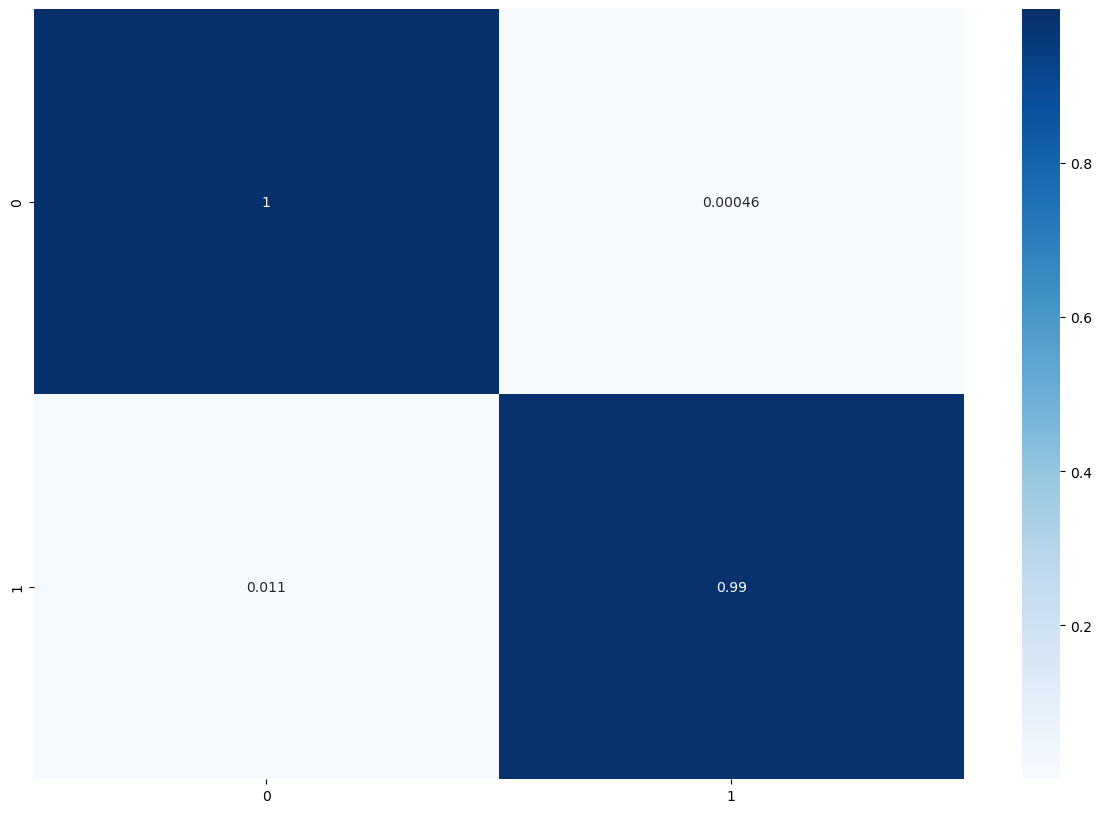

In [ ]:
k1 = confusion_matrix(y_test, y_hat)
cmn = k1.astype('float') / k1.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(15,10))
sns_plot = sns.heatmap(cmn, annot=True, cmap='Blues',xticklabels = list(voting_clf.classes_), yticklabels = list(voting_clf.classes_))
fig1 = sns_plot.get_figure()

In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8770
           1       1.00      0.99      0.99      8649

    accuracy                           0.99     17419
   macro avg       0.99      0.99      0.99     17419
weighted avg       0.99      0.99      0.99     17419

